**BIG** **MART** **SALES** **PREDICTION**

In [ ]:
#load necessary libiraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Data Collection and Processing

In [ ]:

# loading the data from csv file to Pandas DataFrame
big_mart_data = pd.read_csv('/content/Train.csv')

**Problem** **Statement**

The dataset includes sales data for various products across multiple stores. Additionally, attributes of each product and store are provided. The goal of this project is to develop a predictive model that can estimate the sales of individual products at specific stores.

Analysis:
Type of problem: Supervised Learning problem

Target feature : Item_Outlet_Sales


In [ ]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Features Description:

Numerical features:

Item_Weight : Weight of the product or item.

Item_Visibility : It displays the total % of each products in several outlets.

Item_MRP : price of the products.

Outlet_Establishment_Year : The year in which the store was established.

Item_Outlet_Sales : sales of the product in a particular store. This is the target variable to be predicted.

Categorical features:

Item_Identifier : Unique product ID (we would want to drop this column later)

Item_Fat_Content : Whether the product is low fat,regular or not

Item_Type : The category to which the product belongs.

Outlet_Identifier : Unique store ID

Outlet_Size : The size of the store in terms of ground area covered.

Outlet_Location_Type : The type of city in which the store is located.

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket.

In [ ]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [ ]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Data Cleaning**

In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are missing values in Item_Weight and Outlet_Size column.

**Handling Missing Values**

The missing values in numerical columns are replaced by mean.While,categorical columns are replaced by mode.

In [ ]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [ ]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
miss_values = big_mart_data['Outlet_Size'].isnull()

In [ ]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


False indicates that if the value is present and True indicates that the value is absent.So,the missing values should replaced with the mode.

In [ ]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Finding the outliers

Some items have significantly greater visibility compared to the majority of items, which have lower visibility.

Some data points show exceptionally high sales figures, exceeding the upper whisker.



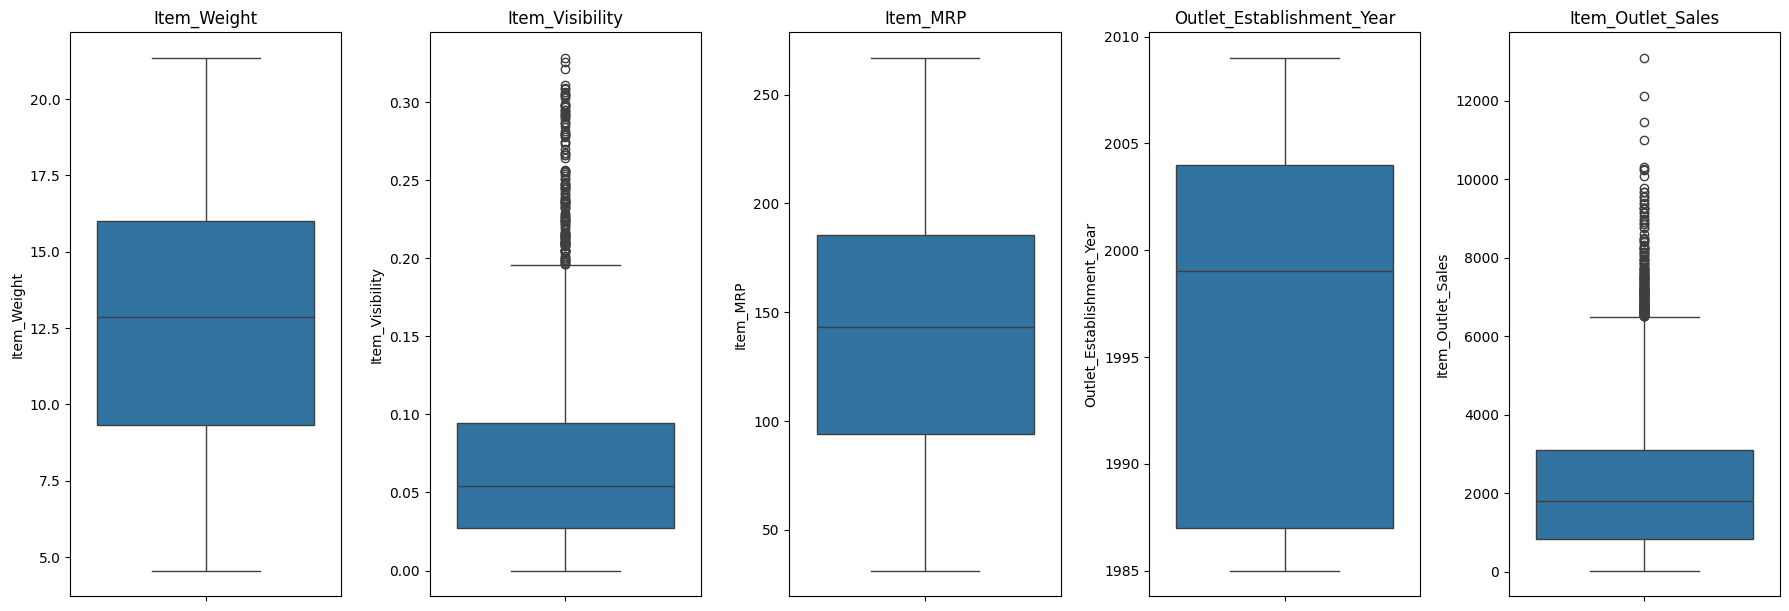

In [ ]:
numerical_columns = big_mart_data.select_dtypes(include='number')

plt.figure(figsize=(18, 12))

num_plots = len(numerical_columns.columns)  # Total number of plots
num_rows = (num_plots // 5) + 1  # Calculate the number of rows needed

for i, col in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 5, i+1)  # Adjusting subplot position
    sns.boxplot(y=numerical_columns[col], showfliers=True)
    plt.title(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**Outlier Removal and Boxplot Visualization of Cleaned Data**

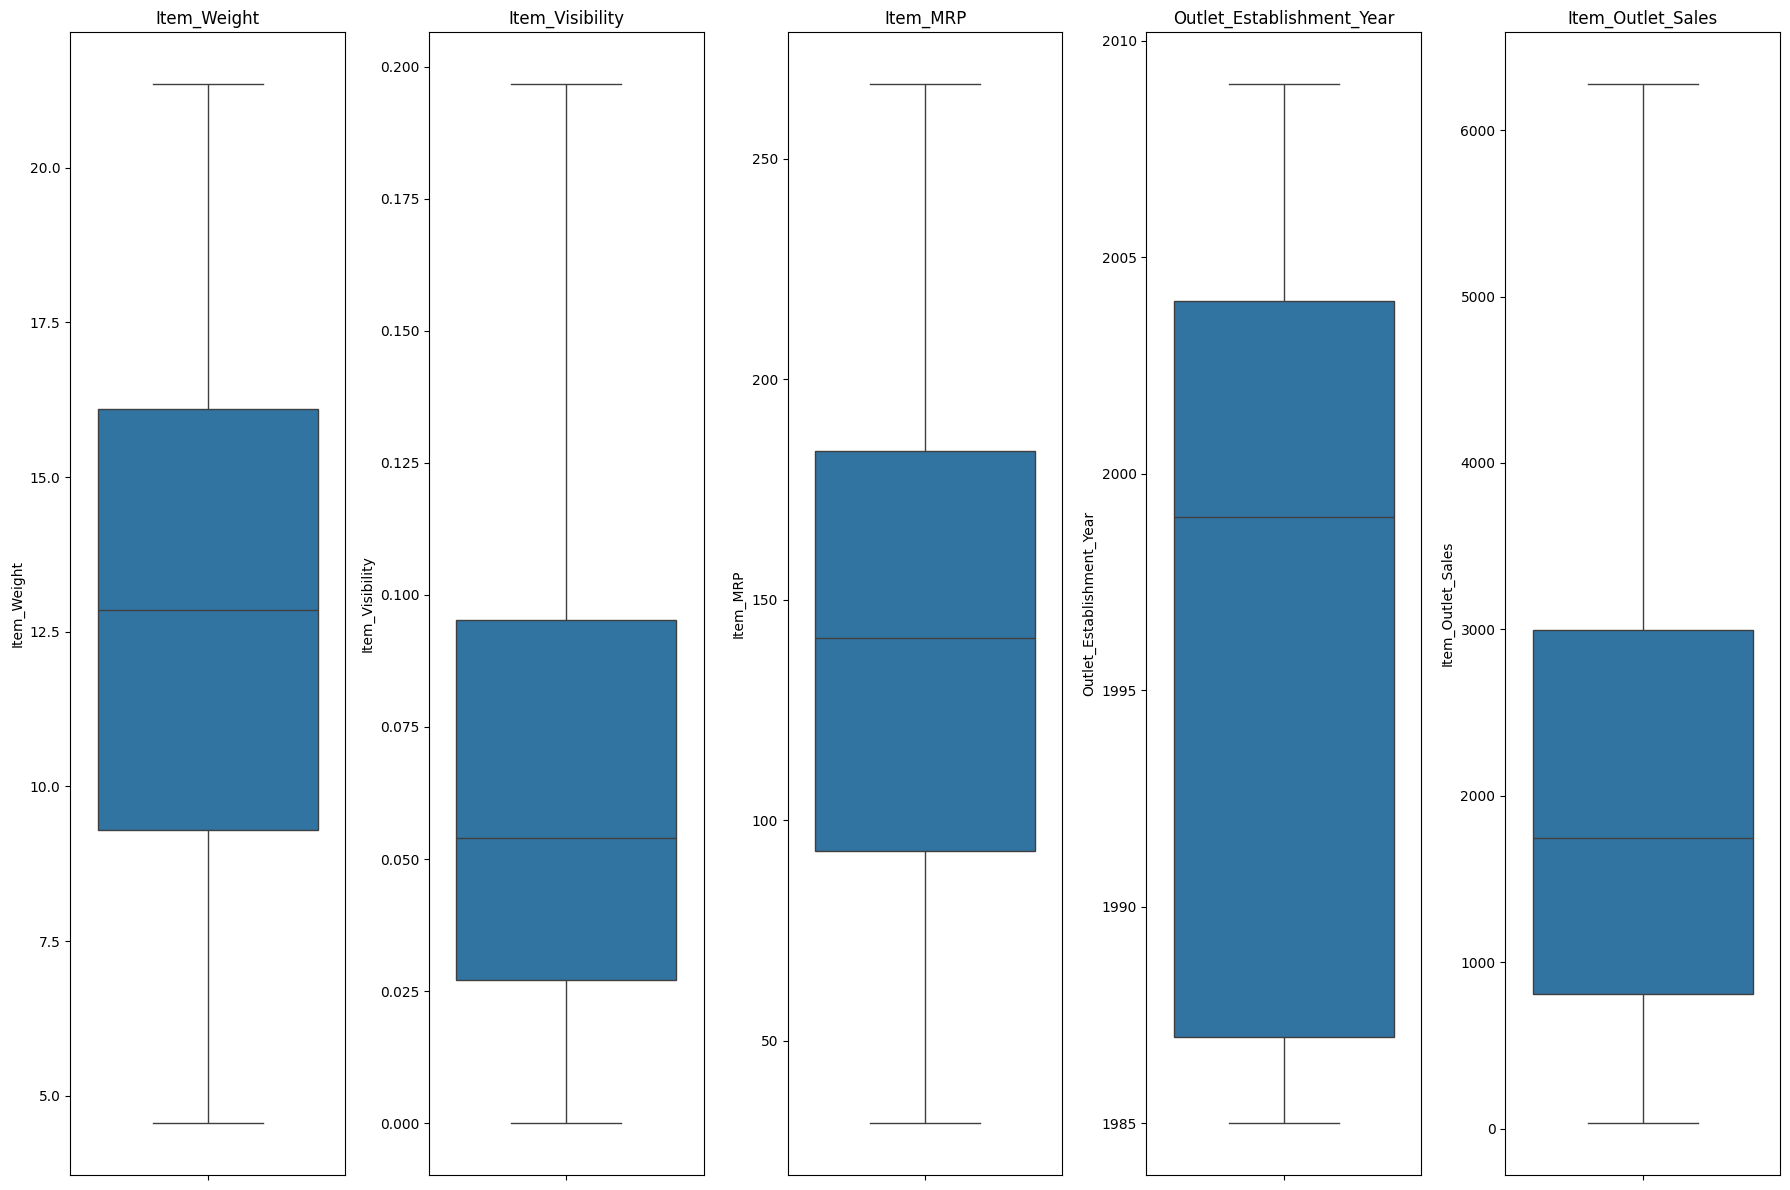

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numerical_columns = big_mart_data.select_dtypes(include='number')

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the threshold to determine outliers
threshold = 1.5

# Define a function to remove outliers based on the IQR method
def remove_outliers(column):
    lower_bound = Q1[column] - threshold * IQR[column]
    upper_bound = Q3[column] + threshold * IQR[column]
    return big_mart_data[(big_mart_data[column] >= lower_bound) & (big_mart_data[column] <= upper_bound)]

# Apply the function to remove outliers from all numerical columns
cleaned_data = big_mart_data.copy()
for col in numerical_columns.columns:
    cleaned_data = remove_outliers(col)

# Now, you can plot the cleaned data without outliers
plt.figure(figsize=(18, 12))
num_plots = len(cleaned_data.select_dtypes(include='number').columns)  # Total number of plots
num_rows = (num_plots // 5) + (1 if num_plots % 5 != 0 else 0)  # Calculate the number of rows needed

for i, col in enumerate(cleaned_data.select_dtypes(include='number').columns):
    plt.subplot(num_rows, 5, i+1)  # Adjusting subplot position
    sns.boxplot(y=cleaned_data[col], showfliers=False)  # Setting showfliers to False
    plt.title(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


The outlier is removed

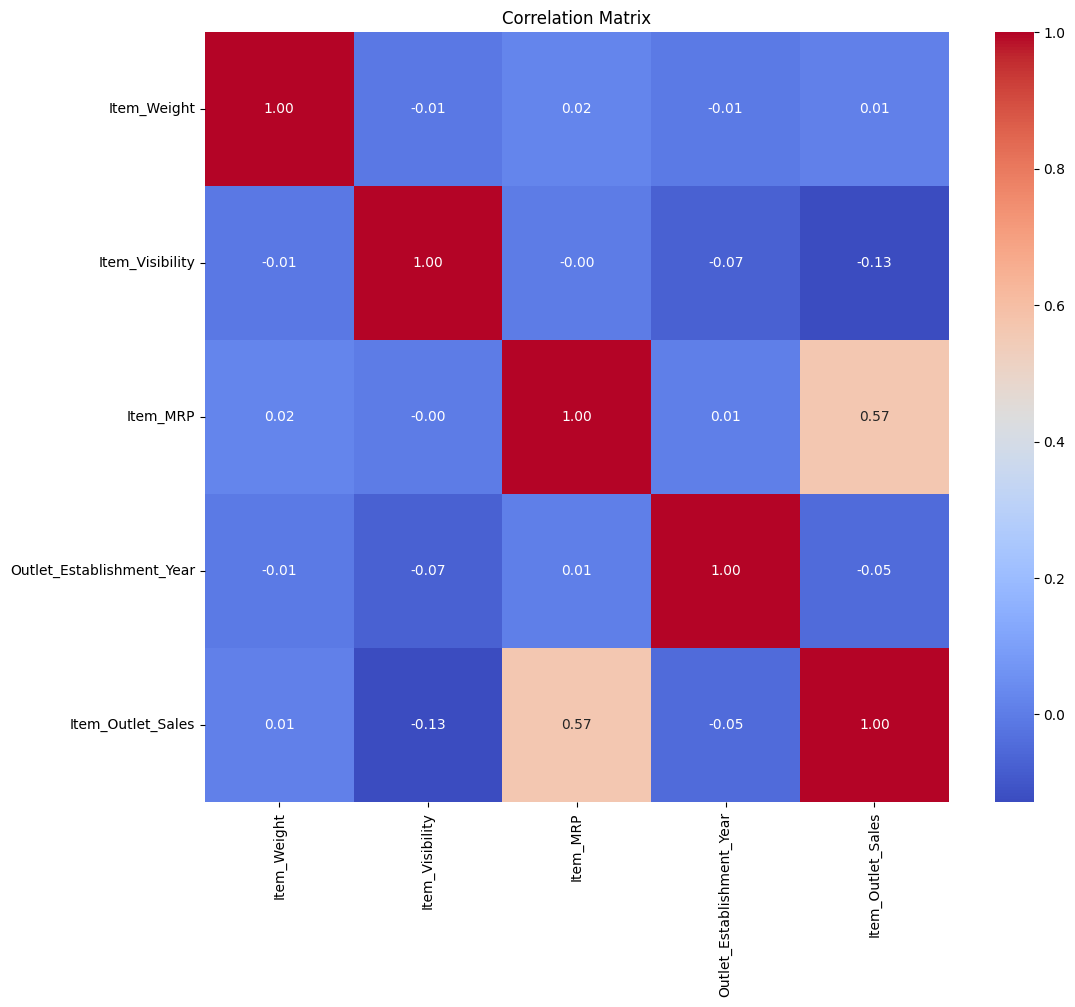

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numerical_columns = big_mart_data.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numerical_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


There isn't much correlation between the variables, except that if Item_MRP increases, Item_Outlet_Sales increases.

**Data Analysis**

In [ ]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Numerical Features

In [ ]:
sns.set()

<ipython-input-44-21151ade0b57>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


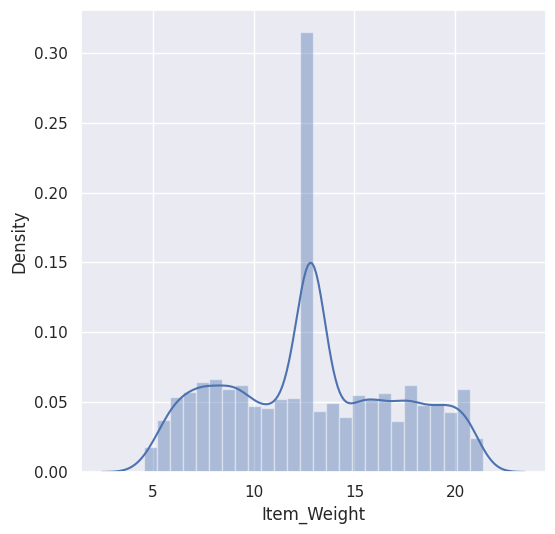

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

The graph illustrates the distribution of item weights, ranging from 5 to 20kg, with a notable concentration of values around 12 kg.

<ipython-input-45-386044597ca3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


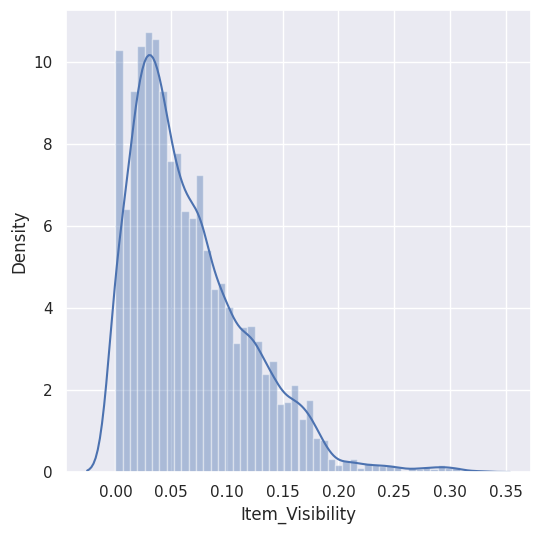

In [ ]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

There is skewness in it.
More values distributed around 0.05 and less values are distributed in between 0.15 and 0.35

The peak sales occurred in 1985, after which sales remained relatively stable, except for 1998.

## Categorical Features

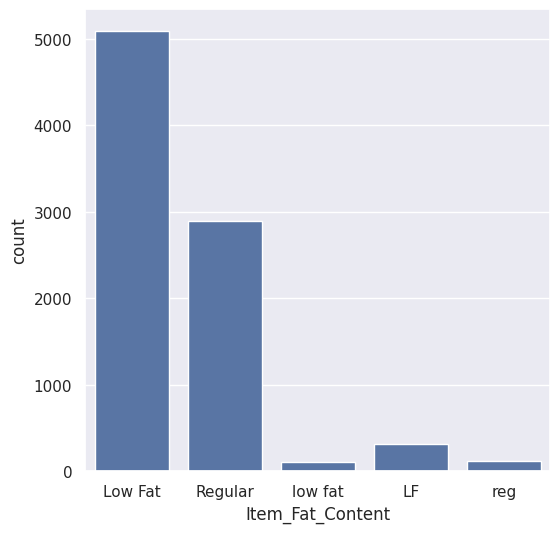

In [ ]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

Data cleaning is necessary in this case because 'LF' (Low Fat) as well as low fat is equivalent to 'Low Fat', and 'reg' corresponds to 'Regular'. Hence, the data needs to be standardized into 'Low Fat' and 'Regular' categories, respectively.

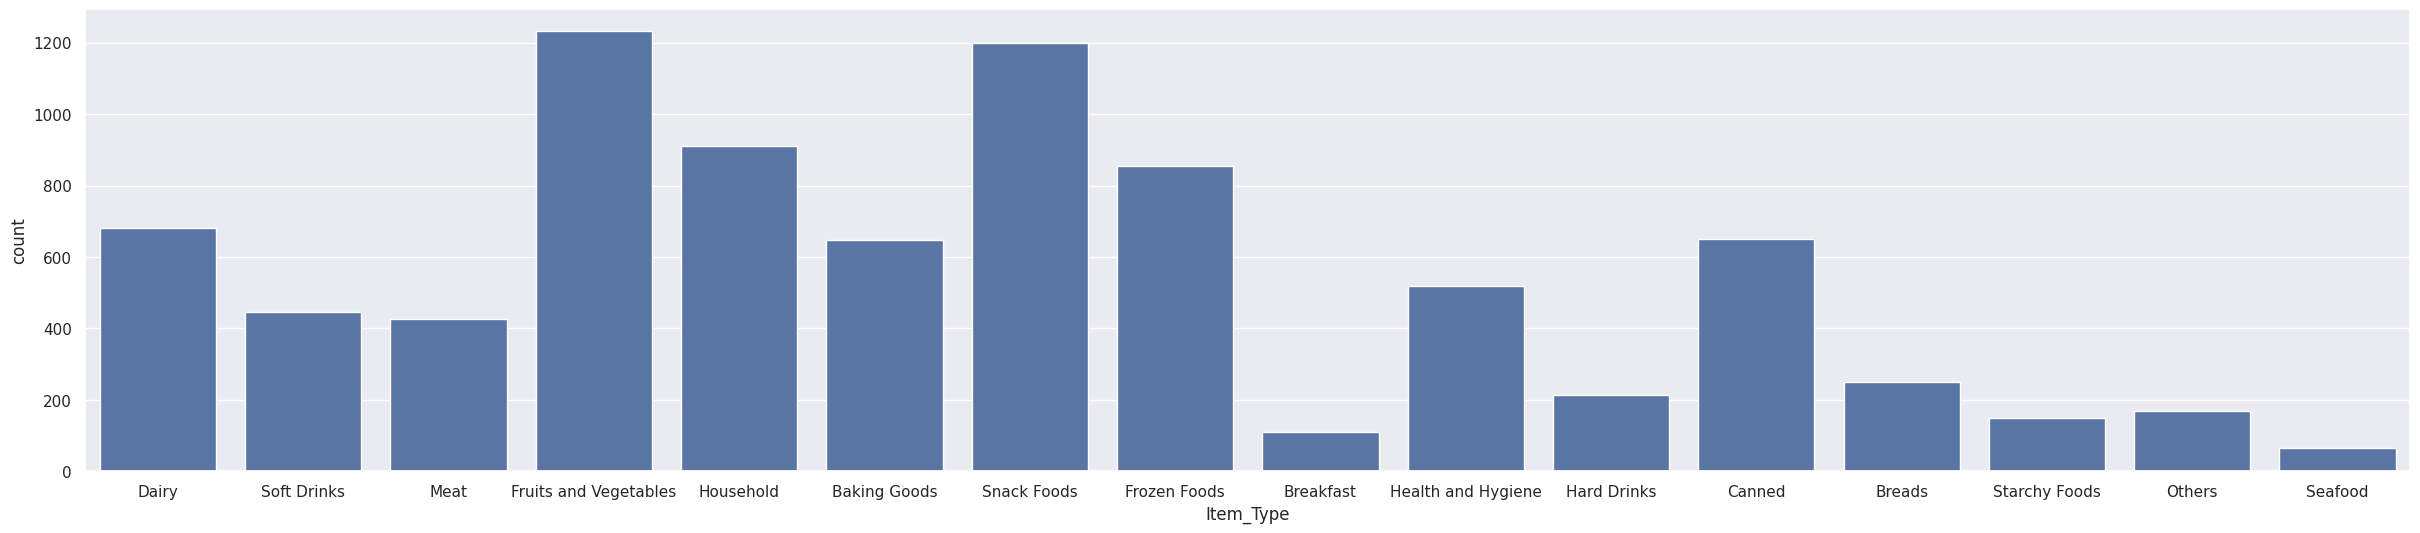

In [ ]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

From the illustration above, we can tell items like fruits and vegetables, household goods, snacks and frozen foods are more sold than the other items.

## Data Pre-Processing

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
#making only two columns and removing all other similar columns
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

any occurrence of 'low fat' or 'LF' in the 'Item_Fat_Content' column will be replaced with 'Low Fat', and any occurrence of 'reg' will be replaced with 'Regular'.

## Label Encoding

In [ ]:
# label encoder function
encoder = LabelEncoder()

In [ ]:
# Encode categorical variables to numerical representations

big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052






Target Variable:Item_Outlet_Sales

Features:Item_Identifier,	Item_Weight,	Item_Fat_Content	,Item_Visibility	,Item_Type	Item_MRP	,Outlet_Identifier	,Outlet_Establishment_Year	,Outlet_Size	,Outlet_Location_Type,Outlet_Type

## Splitting features and Target

In [ ]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


## Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [ ]:
# standardising the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
print(X_train,X_test.std())

[[ 0.71776596 -0.80021083  1.34421592 ... -0.66530465 -1.38348228
  -0.25948864]
 [ 1.20792126  1.21131742 -0.74392811 ...  0.79935376 -0.14965858
  -0.25948864]
 [ 0.86704053  1.11665727  1.34421592 ...  0.79935376 -1.38348228
  -0.25948864]
 ...
 [ 1.52429422  1.11665727 -0.74392811 ...  0.79935376 -0.14965858
  -0.25948864]
 [-0.3806275   1.76744582 -0.74392811 ...  0.79935376 -0.14965858
  -0.25948864]
 [ 1.41289529  0.82084429 -0.74392811 ...  0.79935376 -1.38348228
  -0.25948864]] 0.9991808354401464


**Machine** **Learning** **Model** **Training**

In [ ]:
# to Create a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
lr = LinearRegression()
# Fit the model to the training data
lr.fit(X_train,Y_train)
y_train_pred = lr.predict(X_train)
# Make predictions on the testing data
y_test_pred = lr.predict(X_test)



In [ ]:
# Make predictions on the testing data
mse_train = mean_squared_error(Y_train,y_train_pred)
mse_test = mean_squared_error(Y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_score_train = r2_score(Y_train,y_train_pred)
r2_score_test = r2_score(Y_test,y_test_pred)
print('mse_train =',mse_train)
print('mse_train =',mse_test)

mse_train = 1480735.6801965197
mse_train = 1304191.461162658


In [ ]:
print('rmse_train =',rmse_train)
print('rmse_test =',rmse_test)


rmse_train = 1216.8548311924967
rmse_test = 1142.0120232128286


In [ ]:
print('r2_score_train =',r2_score_train)
print('r2_score_test =',r2_score_test)

r2_score_train = 0.49942172643737814
r2_score_test = 0.520159740836995


This suggests that the model explains roughly 49.94% of the variance in the training data and approximately 52.02% of the variance in the testing data. While the model performs slightly better on the testing dataset compared to the training dataset, both scores indicate moderate predictive capability.